# crypto_ml scratch note
Cryptocurrency machine learning project 
## Project assumptions:
### Must have:
- Connect to cryptocurrency exchange API (Binance API) and download data
- Save data to database 
- Periodic data update
- Data analysis and prepering.
- Create a machine learning model 
- Result presentation and adapting the application to the user 
### Nice have:
- Copmarsion of different ML models
- Adding new options for user
### Vision:
- Creating a trading bot
- Creating a model based on reinforcement learning


In [ ]:
import requests
import pandas as pd

In [102]:
api_base_endpoint = "https://api.binance.com"
api_current_price = api_base_endpoint + "/api/v3/ticker/price"
api_historical_price = api_base_endpoint + "/api/v3/klines?limit=1000&symbol=BTCUSDT&interval=1d"

In [103]:
r_current_price = requests.get(api_current_price)
r_historical_price = requests.get(api_historical_price)

In [104]:
current_price = pd.read_json(r_current_price.text)
historical_price = pd.read_json(r_historical_price.text)

In [105]:
current_price

,symbol,price
0,ETHBTC,0.044679
1,LTCBTC,0.004555
2,BNBBTC,0.010097
3,NEOBTC,0.001670
4,QTUMETH,0.005418
...,...,...
1409,BARBUSD,36.516000
1410,BARUSDT,36.600000
1411,FORTHBTC,0.000771
1412,FORTHBUSD,37.553000


In [106]:
historical_price

,0,1,2,3,4,5,6,7,8,9,10,11
0,1532908800000,8210.99,8273.00,7866.00,8173.92,39692.416542,1532995199999,3.215998e+08,206911,20676.100069,1.677538e+08,0
1,1532995200000,8171.40,8180.00,7633.00,7730.93,48296.915587,1533081599999,3.798414e+08,239132,24273.184891,1.908858e+08,0
2,1533081600000,7735.67,7750.00,7430.00,7604.58,42582.312932,1533167999999,3.222521e+08,208008,22159.785618,1.677345e+08,0
3,1533168000000,7600.08,7709.46,7455.72,7525.71,37665.696684,1533254399999,2.856567e+08,175627,21216.838126,1.609715e+08,0
4,1533254400000,7525.71,7540.00,7282.44,7418.78,44669.486047,1533340799999,3.305998e+08,226727,23397.041835,1.731445e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1618876800000,55633.14,57076.24,53329.96,56425.00,72744.482151,1618963199999,4.037701e+09,2148820,35519.589727,1.971917e+09,0
996,1618963200000,56425.00,56757.91,53536.02,53787.63,66984.756909,1619049599999,3.704550e+09,2134946,32188.929493,1.780066e+09,0
997,1619049600000,53787.62,55521.48,50500.00,51690.96,104656.631337,1619135999999,5.594984e+09,2744621,50550.771470,2.703745e+09,0
998,1619136000000,51690.95,52131.85,47500.00,51125.14,132230.780719,1619222399999,6.571097e+09,2888237,63769.621253,3.170393e+09,0


In [107]:
del_columns = historical_price.iloc[:,6:]
del_columns

,6,7,8,9,10,11
0,1532995199999,3.215998e+08,206911,20676.100069,1.677538e+08,0
1,1533081599999,3.798414e+08,239132,24273.184891,1.908858e+08,0
2,1533167999999,3.222521e+08,208008,22159.785618,1.677345e+08,0
3,1533254399999,2.856567e+08,175627,21216.838126,1.609715e+08,0
4,1533340799999,3.305998e+08,226727,23397.041835,1.731445e+08,0
...,...,...,...,...,...,...
995,1618963199999,4.037701e+09,2148820,35519.589727,1.971917e+09,0
996,1619049599999,3.704550e+09,2134946,32188.929493,1.780066e+09,0
997,1619135999999,5.594984e+09,2744621,50550.771470,2.703745e+09,0
998,1619222399999,6.571097e+09,2888237,63769.621253,3.170393e+09,0


In [108]:
historical_price = historical_price.drop(del_columns, axis=1)
historical_price

,0,1,2,3,4,5
0,1532908800000,8210.99,8273.00,7866.00,8173.92,39692.416542
1,1532995200000,8171.40,8180.00,7633.00,7730.93,48296.915587
2,1533081600000,7735.67,7750.00,7430.00,7604.58,42582.312932
3,1533168000000,7600.08,7709.46,7455.72,7525.71,37665.696684
4,1533254400000,7525.71,7540.00,7282.44,7418.78,44669.486047
...,...,...,...,...,...,...
995,1618876800000,55633.14,57076.24,53329.96,56425.00,72744.482151
996,1618963200000,56425.00,56757.91,53536.02,53787.63,66984.756909
997,1619049600000,53787.62,55521.48,50500.00,51690.96,104656.631337
998,1619136000000,51690.95,52131.85,47500.00,51125.14,132230.780719


In [109]:
historical_price = historical_price.rename(columns={0:'Open time', 1:'Open', 2:'High', 3:'Low', 4:'Close', 5:'Volume'})
historical_price

,Open time,Open,High,Low,Close,Volume
0,1532908800000,8210.99,8273.00,7866.00,8173.92,39692.416542
1,1532995200000,8171.40,8180.00,7633.00,7730.93,48296.915587
2,1533081600000,7735.67,7750.00,7430.00,7604.58,42582.312932
3,1533168000000,7600.08,7709.46,7455.72,7525.71,37665.696684
4,1533254400000,7525.71,7540.00,7282.44,7418.78,44669.486047
...,...,...,...,...,...,...
995,1618876800000,55633.14,57076.24,53329.96,56425.00,72744.482151
996,1618963200000,56425.00,56757.91,53536.02,53787.63,66984.756909
997,1619049600000,53787.62,55521.48,50500.00,51690.96,104656.631337
998,1619136000000,51690.95,52131.85,47500.00,51125.14,132230.780719


In [110]:
historical_price['Open time'] = pd.to_datetime(historical_price['Open time'], unit="ms")
historical_price

,Open time,Open,High,Low,Close,Volume
0,2018-07-30,8210.99,8273.00,7866.00,8173.92,39692.416542
1,2018-07-31,8171.40,8180.00,7633.00,7730.93,48296.915587
2,2018-08-01,7735.67,7750.00,7430.00,7604.58,42582.312932
3,2018-08-02,7600.08,7709.46,7455.72,7525.71,37665.696684
4,2018-08-03,7525.71,7540.00,7282.44,7418.78,44669.486047
...,...,...,...,...,...,...
995,2021-04-20,55633.14,57076.24,53329.96,56425.00,72744.482151
996,2021-04-21,56425.00,56757.91,53536.02,53787.63,66984.756909
997,2021-04-22,53787.62,55521.48,50500.00,51690.96,104656.631337
998,2021-04-23,51690.95,52131.85,47500.00,51125.14,132230.780719


In [113]:
historical_price = historical_price[::-1]
historical_price = historical_price.set_index('Open time')
historical_price

,Open,High,Low,Close,Volume
Open time,,,,,
2021-04-24,51110.56,51166.22,48925.15,49127.94,25748.317146
2021-04-23,51690.95,52131.85,47500.00,51125.14,132230.780719
2021-04-22,53787.62,55521.48,50500.00,51690.96,104656.631337
2021-04-21,56425.00,56757.91,53536.02,53787.63,66984.756909
2021-04-20,55633.14,57076.24,53329.96,56425.00,72744.482151
...,...,...,...,...,...
2018-08-03,7525.71,7540.00,7282.44,7418.78,44669.486047
2018-08-02,7600.08,7709.46,7455.72,7525.71,37665.696684
2018-08-01,7735.67,7750.00,7430.00,7604.58,42582.312932


<AxesSubplot:xlabel='Open time'>

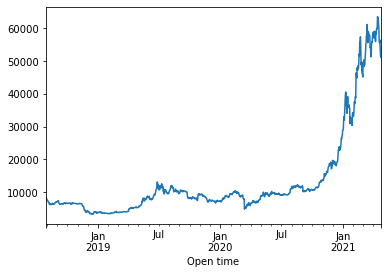

In [114]:
historical_price['Open'].plot()